In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import os 

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches

from tqdm import tqdm_notebook as tqdm

In [2]:
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import seaborn as sns
sns.set(style="ticks", palette="muted", rc={"xtick.bottom" : True, "ytick.left" : True})
plt.style.use('../asteroseismology/epsilon/matplotlibrc')

In [5]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [6]:
multislosh = np.load('multislosh_onlinetriplettrain_trial2_embed2.npz')
multislosh

In [7]:
multislosh['embedding']

array([[-1.74838054,  0.81543165],
       [ 0.17770322, -1.00740516],
       [-0.82276744,  0.23645224],
       ...,
       [-0.44547623,  1.12565744],
       [-0.61867416,  1.03268492],
       [ 0.53694522,  0.69999528]])

In [8]:
multislosh['label']

array([2., 7., 7., ..., 2., 7., 0.])

In [55]:
[(x, len(multislosh['label'][multislosh['label']==x])) for x in range(8)]

[(0, 757),
 (1, 850),
 (2, 1035),
 (3, 347),
 (4, 186),
 (5, 214),
 (6, 54),
 (7, 1448)]

In [9]:
multislosh['filename']

array(['/home/z3384751/PycharmProjects/Echelle_DAGMM/kepler_q9/starclass_image_StandardScaled/2450566_CONTACT_ROT.image.npz',
       '/home/z3384751/PycharmProjects/Echelle_DAGMM/kepler_q9/starclass_image_StandardScaled/7266176_SOLARLIKE.image.npz',
       '/home/z3384751/PycharmProjects/Echelle_DAGMM/kepler_q9/starclass_image_StandardScaled/3633335_SOLARLIKE.image.npz',
       ...,
       '/home/z3384751/PycharmProjects/Echelle_DAGMM/kepler_q9/starclass_image_StandardScaled/7900973_CONTACT_ROT.image.npz',
       '/home/z3384751/PycharmProjects/Echelle_DAGMM/kepler_q9/starclass_image_StandardScaled/5616250_SOLARLIKE.image.npz',
       '/home/z3384751/PycharmProjects/Echelle_DAGMM/kepler_q9/starclass_image_StandardScaled/201584087_APERIODIC.image.npz'],
      dtype='<U122')

In [10]:
labels = {'APERIODIC':     0,  
          'CONSTANT' :     1,  
          'CONTACT_ROT':   2,  
          'DSCT_BCEP':     3,  
          'ECLIPSE':       4, 
          'GDOR_SPB':      5,
          'RRLYR_CEPHEID': 6,  
          'SOLARLIKE':     7}

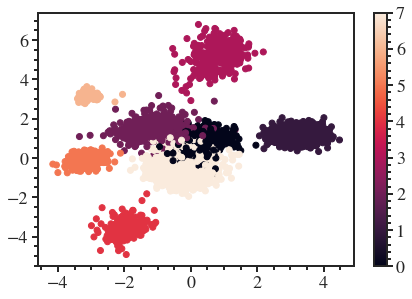

In [11]:
plt.scatter(multislosh['embedding'][:,0], multislosh['embedding'][:,1], c=multislosh['label'])
plt.colorbar()
plt.show()

In [12]:
X = multislosh['embedding']

def rem_class(cls=0):
    return (np.array([x for idx, x in enumerate(X) if multislosh['label'][idx] != cls]),
            np.array([x for idx, x in enumerate(X) if multislosh['label'][idx] == cls]))

In [13]:
X0, y0 = rem_class(0)
X0, y0

(array([[-1.74838054,  0.81543165],
        [ 0.17770322, -1.00740516],
        [-0.82276744,  0.23645224],
        ...,
        [-2.23002172, -4.029212  ],
        [-0.44547623,  1.12565744],
        [-0.61867416,  1.03268492]]), array([[ 0.32197893,  1.14871991],
        [ 0.28743538,  0.89778554],
        [-0.38129526,  1.39832509],
        ...,
        [ 0.56114739,  1.26666224],
        [ 0.79296243,  0.81418574],
        [ 0.53694522,  0.69999528]]))

In [14]:
len(X), len(X0)

(4891, 4134)

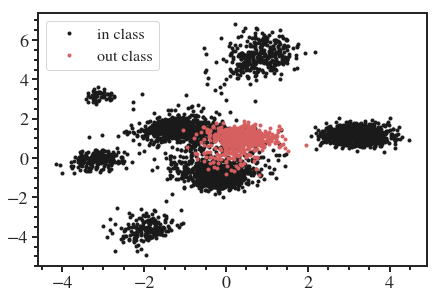

In [15]:
plt.plot(X0[:,0], X0[:,1], 'k.', label='in class')
plt.plot(y0[:,0], y0[:,1], 'r.', label='out class')
#plt.colorbar()
plt.legend()
plt.show()

In [16]:
train, test = train_test_split(X0)

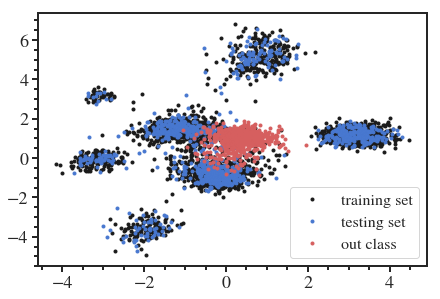

In [17]:
plt.plot(train[:,0], train[:,1], 'k.', label='training set')
plt.plot(test[:,0], test[:,1], 'b.', label='testing set')
plt.plot(y0[:,0], y0[:,1], 'r.', label='out class')
#plt.colorbar()
plt.legend()
plt.show()

In [18]:
iso_f = IsolationForest(behaviour='new', contamination=0.01)#'auto')
iso_f.fit(train)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.01,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=None, verbose=0)

In [19]:
tp = np.array([test[idx] for idx, x in enumerate(iso_f.predict(test)) if x == 1])
fp = np.array([test[idx] for idx, x in enumerate(iso_f.predict(test)) if x == -1])
tn = np.array([y0[idx] for idx, y in enumerate(iso_f.predict(y0)) if y == 1])
fn = np.array([y0[idx] for idx, y in enumerate(iso_f.predict(y0)) if y == -1])

In [20]:
fp

array([[ 0.75446355,  6.55013847],
       [-2.50601602, -4.0607729 ],
       [-2.24724793, -4.27702856],
       [-2.23762298, -4.16743946],
       [-2.20219827, -4.47547865],
       [-2.44348025, -3.95312071],
       [ 1.40009558,  6.10850143],
       [-2.18840098, -4.16365099],
       [-2.9929347 , -3.44613957],
       [ 1.2936579 ,  6.22683239],
       [-2.50808001, -4.26310635],
       [ 1.47679758,  6.05869675],
       [ 1.74977887,  5.81731033],
       [-2.917243  , -4.02025127],
       [-2.82333732, -3.6729207 ],
       [-2.17687201, -4.71827602]])

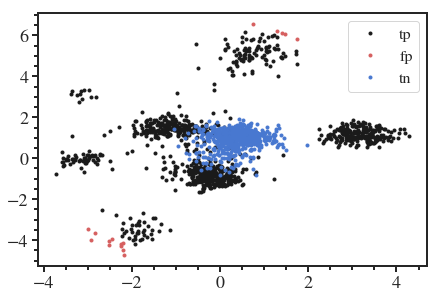

In [21]:
plt.plot(tp[:,0], tp[:,1], 'k.', label='tp')
plt.plot(fp[:,0], fp[:,1], 'r.', label='fp')
plt.plot(tn[:,0], tn[:,1], 'b.', label='tn')
#plt.plot(fn[:,0], fn[:,1], 'g.', label='fn')
plt.legend()
plt.show()

In [22]:
psd_dir = 'kepler_q9_psd'
filenames = os.listdir(psd_dir)

In [23]:
psd = np.load(os.path.join(psd_dir, filenames[0]))
freq = psd['freq']
power = psd['power']

In [73]:
len(freq)

3353

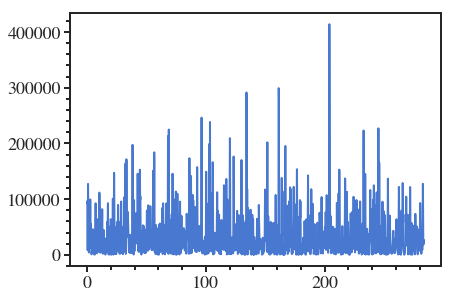

In [24]:
plt.plot(freq, power)
plt.show()

In [25]:
psd_dir = 'kepler_q9_psd'
psds = np.array([np.load(os.path.join(psd_dir, filename))['power'][:3351]
                 for filename in os.listdir(psd_dir)])

In [26]:
psds.shape

(5755, 3351)

In [27]:
psd_names = [filename.split('.')[0]
             for filename in os.listdir(psd_dir)]
psd_names

['constant_611_CONSTANT',
 '6371322_GDOR_SPB',
 '5963253_CONTACT_ROT',
 'constant_205_CONSTANT',
 '10659100_SOLARLIKE',
 '9245929_CONTACT_ROT',
 '4682420_SOLARLIKE',
 '201657672_APERIODIC',
 'fakerrlyr_11_RRLYR_CEPHEID',
 '3861139_DSCT_BCEP',
 '4386091_DSCT_BCEP',
 '5783203_DSCT_BCEP',
 '6508366_SOLARLIKE',
 '10960995_ECLIPSE',
 '7756571_CONTACT_ROT',
 '9712888_SOLARLIKE',
 '201774618_APERIODIC',
 '10484817_DSCT_BCEP',
 'constant_906_CONSTANT',
 '6965293_ECLIPSE',
 '201499765_APERIODIC',
 'constant_644_CONSTANT',
 '7901718_DSCT_BCEP',
 '5631042_CONTACT_ROT',
 '11087371_SOLARLIKE',
 '6227242_SOLARLIKE',
 '10537528_DSCT_BCEP',
 '6790335_DSCT_BCEP',
 '2159700_CONTACT_ROT',
 '5707560_SOLARLIKE',
 '10029763_SOLARLIKE',
 'constant_633_CONSTANT',
 '8524425_SOLARLIKE',
 'constant_371_CONSTANT',
 '8123127_GDOR_SPB',
 '201162267_APERIODIC',
 '4265387_CONTACT_ROT',
 '10684837_SOLARLIKE',
 '8316503_ECLIPSE',
 '201653648_APERIODIC',
 '12120327_SOLARLIKE',
 '10157917_CONTACT_ROT',
 'constant_216_CON

In [28]:
multislosh_names = [filename.split('/')[-1].split('.')[0] for filename in multislosh['filename']]
multislosh_names 

['2450566_CONTACT_ROT',
 '7266176_SOLARLIKE',
 '3633335_SOLARLIKE',
 '3748748_GDOR_SPB',
 '8035459_CONTACT_ROT',
 'constant_950_CONSTANT',
 '12118044_SOLARLIKE',
 '6635026_DSCT_BCEP',
 '7186846_CONTACT_ROT',
 'constant_6_CONSTANT',
 '11455925_SOLARLIKE',
 '202091974_APERIODIC',
 '7877673_SOLARLIKE',
 '202086018_APERIODIC',
 '5171499_CONTACT_ROT',
 '11408704_SOLARLIKE',
 '8022337_CONTACT_ROT',
 'constant_744_CONSTANT',
 'constant_321_CONSTANT',
 'constant_545_CONSTANT',
 '10992834_CONTACT_ROT',
 '6464938_DSCT_BCEP',
 '8980809_CONTACT_ROT',
 '8285025_SOLARLIKE',
 'constant_467_CONSTANT',
 'constant_531_CONSTANT',
 '201540872_APERIODIC',
 '9304923_DSCT_BCEP',
 '9821783_SOLARLIKE',
 '11811856_CONTACT_ROT',
 '201655304_APERIODIC',
 '3756730_CONTACT_ROT',
 'constant_202_CONSTANT',
 '202087508_APERIODIC',
 '9405452_CONTACT_ROT',
 '11650219_SOLARLIKE',
 'constant_833_CONSTANT',
 'constant_250_CONSTANT',
 '8557457_SOLARLIKE',
 '9655177_DSCT_BCEP',
 '8196181_GDOR_SPB',
 '8088354_ECLIPSE',
 '5967

In [29]:
both = set(psd_names).intersection(multislosh_names)
both

{'11858541_ECLIPSE',
 'constant_282_CONSTANT',
 '3736200_CONTACT_ROT',
 '201723541_APERIODIC',
 '201399640_APERIODIC',
 '10119517_CONTACT_ROT',
 'constant_739_CONSTANT',
 '5967447_CONTACT_ROT',
 '201163478_APERIODIC',
 '8907618_DSCT_BCEP',
 '9415248_SOLARLIKE',
 '9591519_DSCT_BCEP',
 '9283112_SOLARLIKE',
 '3547041_SOLARLIKE',
 '4568936_CONTACT_ROT',
 '4853067_CONTACT_ROT',
 '5563209_CONTACT_ROT',
 '4859022_CONTACT_ROT',
 '9826171_CONTACT_ROT',
 'constant_668_CONSTANT',
 '9419694_GDOR_SPB',
 '10287874_GDOR_SPB',
 '2437452_ECLIPSE',
 'constant_919_CONSTANT',
 '202091406_APERIODIC',
 '5722327_CONTACT_ROT',
 '10351764_SOLARLIKE',
 '2450384_CONTACT_ROT',
 '4569298_SOLARLIKE',
 '9843451_CONTACT_ROT',
 '6385342_GDOR_SPB',
 '201168813_APERIODIC',
 'constant_806_CONSTANT',
 '201782458_APERIODIC',
 '8483322_CONTACT_ROT',
 '11808481_SOLARLIKE',
 '10207524_SOLARLIKE',
 '5450166_GDOR_SPB',
 '8523194_CONTACT_ROT',
 '10257683_SOLARLIKE',
 '8934111_CONTACT_ROT',
 '5456612_SOLARLIKE',
 '8671819_SOLARLI

In [30]:
psd_dir = 'kepler_q9_psd'
psds = np.array([np.load(os.path.join(psd_dir, filename))['power'][:3351]
                 for filename in os.listdir(psd_dir) if filename.split('.')[0] in both])
psds.shape

(4891, 3351)

In [31]:
train_test_cut_idx = 4000

In [32]:
train, test = psds[:train_test_cut_idx], psds[train_test_cut_idx:] #train_test_split(psds)
test.shape

(891, 3351)

In [33]:
iso_f = IsolationForest(behaviour='new', contamination='auto')
iso_f.fit(train)

IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=None, verbose=0)

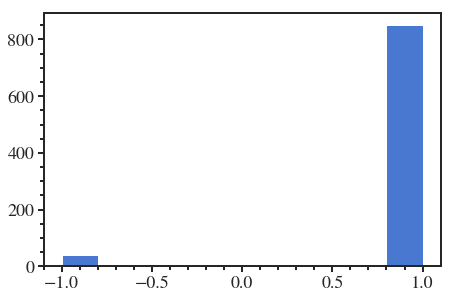

In [34]:
plt.hist(iso_f.predict(test))
plt.show()

In [35]:
coords = {}
for idx, filename in enumerate(multislosh['filename']):
    coords[filename.split('/')[-1].split('.')[0]] = (X[idx], multislosh['label'][idx])
coords

{'2450566_CONTACT_ROT': (array([-1.74838054,  0.81543165]), 2.0),
 '7266176_SOLARLIKE': (array([ 0.17770322, -1.00740516]), 7.0),
 '3633335_SOLARLIKE': (array([-0.82276744,  0.23645224]), 7.0),
 '3748748_GDOR_SPB': (array([-3.15672183, -0.29946667]), 5.0),
 '8035459_CONTACT_ROT': (array([-0.97662717,  1.57901871]), 2.0),
 'constant_950_CONSTANT': (array([3.40839815, 1.07505786]), 1.0),
 '12118044_SOLARLIKE': (array([-0.45283359, -1.12900293]), 7.0),
 '6635026_DSCT_BCEP': (array([1.19068658, 4.51340437]), 3.0),
 '7186846_CONTACT_ROT': (array([-0.22814283,  1.28258932]), 2.0),
 'constant_6_CONSTANT': (array([2.60850477, 1.3542192 ]), 1.0),
 '11455925_SOLARLIKE': (array([-0.32888925, -1.13640094]), 7.0),
 '202091974_APERIODIC': (array([0.32197893, 1.14871991]), 0.0),
 '7877673_SOLARLIKE': (array([-0.01285552, -0.54580295]), 7.0),
 '202086018_APERIODIC': (array([0.28743538, 0.89778554]), 0.0),
 '5171499_CONTACT_ROT': (array([-0.9510861 ,  1.85897493]), 2.0),
 '11408704_SOLARLIKE': (array([

In [36]:
psd_embed = np.array([coords[filename.split('.')[0]][0]
    for filename in os.listdir(psd_dir) if filename.split('.')[0] in both])
psd_embed.shape

(4891, 2)

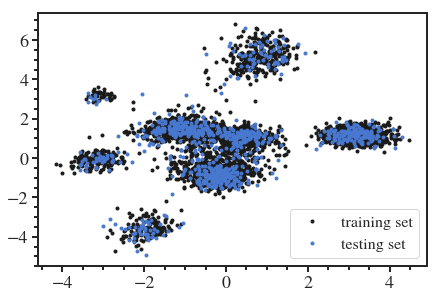

In [37]:
plt.plot(psd_embed[:train_test_cut_idx,0], psd_embed[:train_test_cut_idx,1], 'k.', label='training set')
plt.plot(psd_embed[train_test_cut_idx:,0], psd_embed[train_test_cut_idx:,1], 'b.', label='testing set')
plt.legend()
plt.show()

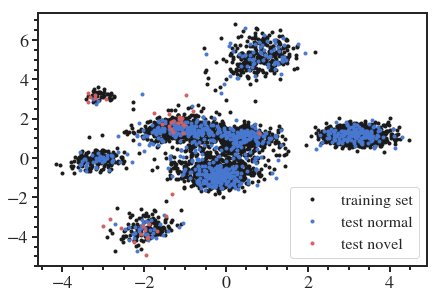

In [38]:
plt.plot(psd_embed[:train_test_cut_idx,0], psd_embed[:train_test_cut_idx,1], 'k.', label='training set', zorder=0)

normal = psd_embed[train_test_cut_idx:][iso_f.predict(test) == 1]
novel  = psd_embed[train_test_cut_idx:][iso_f.predict(test) == -1]

plt.plot(normal[:,0], normal[:,1], 'b.', label='test normal')
plt.plot(novel[:,0], novel[:,1], 'r.', label='test novel')

#plt.scatter(psd_embed[train_test_cut_idx:,0], psd_embed[train_test_cut_idx:,1], label='testing set',
#           c=['red' if x==-1 else 'blue' for x in iso_f.predict(test)], zorder=1)
plt.legend()
plt.show()

In [39]:
coords = {}
for idx, filename in enumerate(multislosh['filename']):
    coords[filename.split('/')[-1].split('.')[0]] = np.array([X[idx,0], X[idx,1], multislosh['label'][idx]])
coords

{'2450566_CONTACT_ROT': array([-1.74838054,  0.81543165,  2.        ]),
 '7266176_SOLARLIKE': array([ 0.17770322, -1.00740516,  7.        ]),
 '3633335_SOLARLIKE': array([-0.82276744,  0.23645224,  7.        ]),
 '3748748_GDOR_SPB': array([-3.15672183, -0.29946667,  5.        ]),
 '8035459_CONTACT_ROT': array([-0.97662717,  1.57901871,  2.        ]),
 'constant_950_CONSTANT': array([3.40839815, 1.07505786, 1.        ]),
 '12118044_SOLARLIKE': array([-0.45283359, -1.12900293,  7.        ]),
 '6635026_DSCT_BCEP': array([1.19068658, 4.51340437, 3.        ]),
 '7186846_CONTACT_ROT': array([-0.22814283,  1.28258932,  2.        ]),
 'constant_6_CONSTANT': array([2.60850477, 1.3542192 , 1.        ]),
 '11455925_SOLARLIKE': array([-0.32888925, -1.13640094,  7.        ]),
 '202091974_APERIODIC': array([0.32197893, 1.14871991, 0.        ]),
 '7877673_SOLARLIKE': array([-0.01285552, -0.54580295,  7.        ]),
 '202086018_APERIODIC': array([0.28743538, 0.89778554, 0.        ]),
 '5171499_CONTACT_

In [40]:
filenames = [filename for filename in os.listdir(psd_dir) if filename.split('.')[0] in both]
filenames

['constant_611_CONSTANT.psd.npz',
 '6371322_GDOR_SPB.psd.npz',
 '5963253_CONTACT_ROT.psd.npz',
 'constant_205_CONSTANT.psd.npz',
 '10659100_SOLARLIKE.psd.npz',
 '9245929_CONTACT_ROT.psd.npz',
 '4682420_SOLARLIKE.psd.npz',
 '201657672_APERIODIC.psd.npz',
 'fakerrlyr_11_RRLYR_CEPHEID.psd.npz',
 '3861139_DSCT_BCEP.psd.npz',
 '4386091_DSCT_BCEP.psd.npz',
 '6508366_SOLARLIKE.psd.npz',
 '10960995_ECLIPSE.psd.npz',
 '7756571_CONTACT_ROT.psd.npz',
 '9712888_SOLARLIKE.psd.npz',
 '201774618_APERIODIC.psd.npz',
 '10484817_DSCT_BCEP.psd.npz',
 '6965293_ECLIPSE.psd.npz',
 '201499765_APERIODIC.psd.npz',
 'constant_644_CONSTANT.psd.npz',
 '7901718_DSCT_BCEP.psd.npz',
 '5631042_CONTACT_ROT.psd.npz',
 '6227242_SOLARLIKE.psd.npz',
 '10537528_DSCT_BCEP.psd.npz',
 '6790335_DSCT_BCEP.psd.npz',
 '2159700_CONTACT_ROT.psd.npz',
 '5707560_SOLARLIKE.psd.npz',
 '10029763_SOLARLIKE.psd.npz',
 '8524425_SOLARLIKE.psd.npz',
 '8123127_GDOR_SPB.psd.npz',
 '201162267_APERIODIC.psd.npz',
 '10684837_SOLARLIKE.psd.npz',
 

In [41]:
psd_embed = np.array([coords[filename.split('.')[0]]
                      for filename in filenames])
psd_embed

array([[ 3.2201798 ,  1.24997914,  1.        ],
       [-3.20931315,  0.41069406,  5.        ],
       [-0.78071976,  1.28554702,  2.        ],
       ...,
       [ 0.55591732,  4.46994781,  3.        ],
       [-1.68792188,  1.38212681,  2.        ],
       [ 0.65085089,  4.96862984,  3.        ]])

In [42]:
psd_dir = 'kepler_q9_psd'
psds = np.array([np.load(os.path.join(psd_dir, filename))['power'][:3351]
                 for filename in filenames])
psds.shape

(4891, 3351)

In [43]:
test_cls = 6

not_cep = psd_embed[:,2] != test_cls
sum(not_cep)

4837

In [89]:
iso_f = IsolationForest(behaviour='new', contamination=0.02)#'auto')
iso_f.fit(psds[not_cep][:4000])

IsolationForest(behaviour='new', bootstrap=False, contamination=0.02,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=None, verbose=0)

In [45]:
psd_embed[not_cep][4000:].shape

(837, 3)

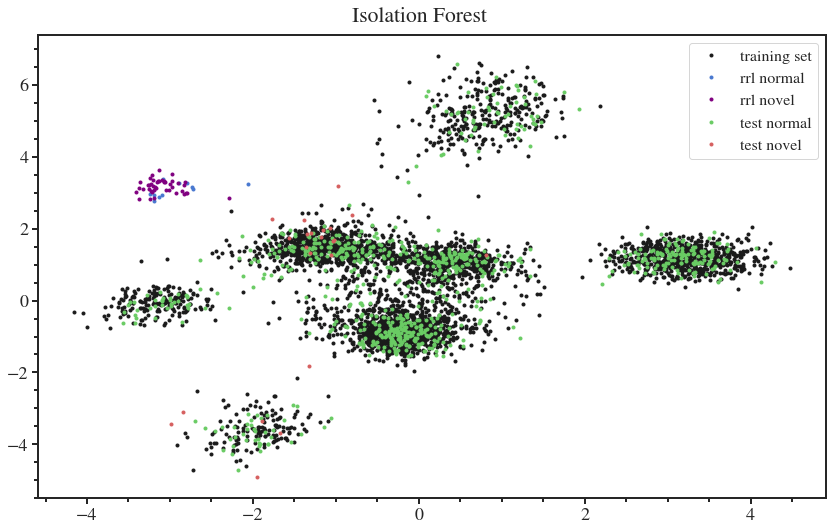

In [91]:
plt.figure(figsize=(12, 12/1.619))

plt.plot(psd_embed[not_cep,0][:4000], psd_embed[not_cep,1][:4000], 'k.', label='training set', zorder=0)
plt.suptitle('Isolation Forest', y=1.005)

cep = np.logical_not(not_cep)
test = iso_f.predict(psds[cep])

normal = psd_embed[cep][test == 1]
novel  = psd_embed[cep][test == -1]

plt.plot(normal[:,0], normal[:,1], 'b.', label='rrl normal')
plt.plot(novel[:,0],  novel[:,1],  '.', c='purple', label='rrl novel')


test2 = iso_f.predict(psds[not_cep][4000:])

normal2 = psd_embed[not_cep][4000:][test2 == 1]
novel2  = psd_embed[not_cep][4000:][test2 == -1]

plt.plot(normal2[:,0], normal2[:,1], 'g.', label='test normal')
plt.plot(novel2[:,0],  novel2[:,1],  'r.', label='test novel')

#plt.scatter(psd_embed[train_test_cut_idx:,0], psd_embed[train_test_cut_idx:,1], label='testing set',
#           c=['red' if x==-1 else 'blue' for x in iso_f.predict(test)], zorder=1)
plt.legend()
plt.show()

In [47]:
from sklearn.svm import OneClassSVM

In [92]:
oc_svm = OneClassSVM(nu=0.02)
oc_svm.fit(psds[not_cep][:4000])

/home/bellinger/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, nu=0.02, random_state=None,
      shrinking=True, tol=0.001, verbose=False)

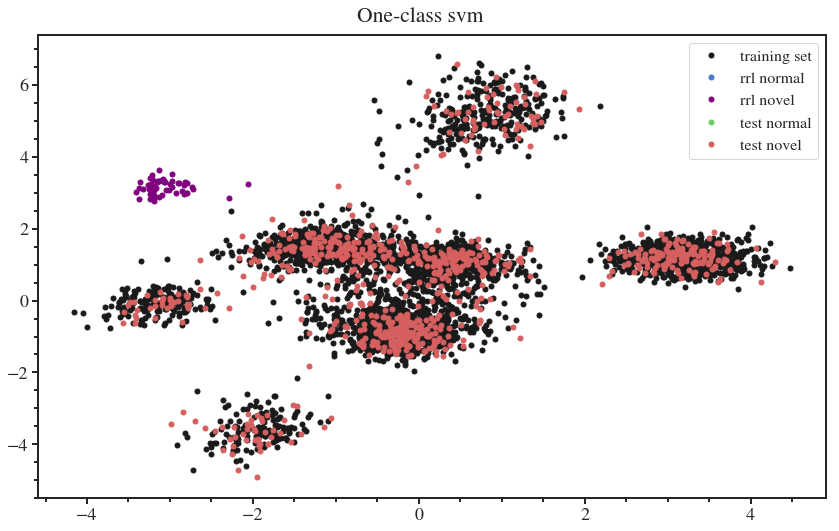

In [95]:
plt.figure(figsize=(12, 12/1.619))

plt.plot(psd_embed[not_cep,0][:4000], psd_embed[not_cep,1][:4000], 'k.', label='training set', zorder=0, ms=10)
plt.suptitle('One-class svm', y=1.005)

cep = np.logical_not(not_cep)
test = oc_svm.predict(psds[cep])

normal = psd_embed[cep][test == 1]
novel  = psd_embed[cep][test == -1]

plt.plot(normal[:,0], normal[:,1], 'b.', label='rrl normal', ms=10)
plt.plot(novel[:,0],  novel[:,1],  '.', c='purple', label='rrl novel', ms=10)


test2 = oc_svm.predict(psds[not_cep][4000:])

normal2 = psd_embed[not_cep][4000:][test2 == 1]
novel2  = psd_embed[not_cep][4000:][test2 == -1]

plt.plot(normal2[:,0], normal2[:,1], 'g.', label='test normal', ms=10)
plt.plot(novel2[:,0],  novel2[:,1],  'r.', label='test novel', ms=10)

#plt.scatter(psd_embed[train_test_cut_idx:,0], psd_embed[train_test_cut_idx:,1], label='testing set',
#           c=['red' if x==-1 else 'blue' for x in iso_f.predict(test)], zorder=1)
plt.legend()
plt.show()

Number of normal in out class: 14
Number of novel in out class: 40
Number of normal in testing set: 824
Number of novel in testing class: 13


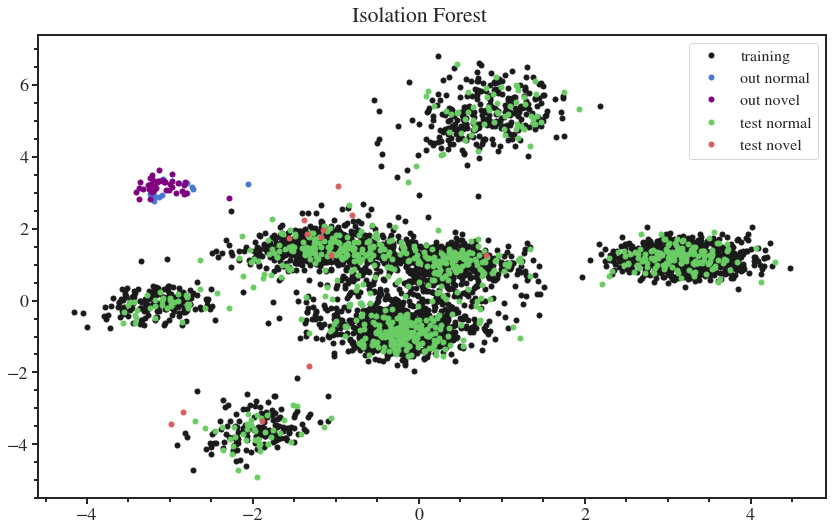

In [106]:
iso_f = IsolationForest(behaviour='new', contamination=0.01, n_estimators=1024)
#oc_svm = OneClassSVM(nu=0.02)

def plot_rem_cls(test_cls=6, test_idx=4000):
    
    in_cls = psd_embed[:,2] != test_cls
    
    iso_f.fit(psds[in_cls][:test_idx])
    
    plt.figure(figsize=(12, 12/1.619))
    
    plt.plot(psd_embed[in_cls,0][:test_idx], 
             psd_embed[in_cls,1][:test_idx], 
             'k.', label='training', zorder=0, ms=10)
    plt.suptitle('Isolation Forest', y=1.005)
    
    out_cls = np.logical_not(in_cls)
    test = iso_f.predict(psds[out_cls])
    
    normal = psd_embed[out_cls][test == 1]
    novel  = psd_embed[out_cls][test == -1]
    
    print("Number of normal in out class:", len(normal))
    print("Number of novel in out class:", len(novel))
    
    plt.plot(normal[:,0], 
             normal[:,1], 
             'b.', label='out normal', ms=10)
    plt.plot(novel[:,0],
             novel[:,1],
             '.', c='purple', label='out novel', ms=10)
    
    
    test2 = iso_f.predict(psds[in_cls][test_idx:])
    
    normal2 = psd_embed[in_cls][test_idx:][test2 == 1]
    novel2  = psd_embed[in_cls][test_idx:][test2 == -1]
    
    print("Number of normal in testing set:", len(normal2))
    print("Number of novel in testing class:", len(novel2))
    
    plt.plot(normal2[:,0], normal2[:,1], 'g.', label='test normal', ms=10)
    plt.plot(novel2[:,0],  novel2[:,1],  'r.', label='test novel', ms=10)
    
    #plt.scatter(psd_embed[train_test_cut_idx:,0], psd_embed[train_test_cut_idx:,1], label='testing set',
    #           c=['red' if x==-1 else 'blue' for x in iso_f.predict(test)], zorder=1)
    plt.legend()
    plt.show()

plot_rem_cls(6)

Number of normal in out class: 850
Number of novel in out class: 0
Number of normal in testing set: 41
Number of novel in testing class: 0


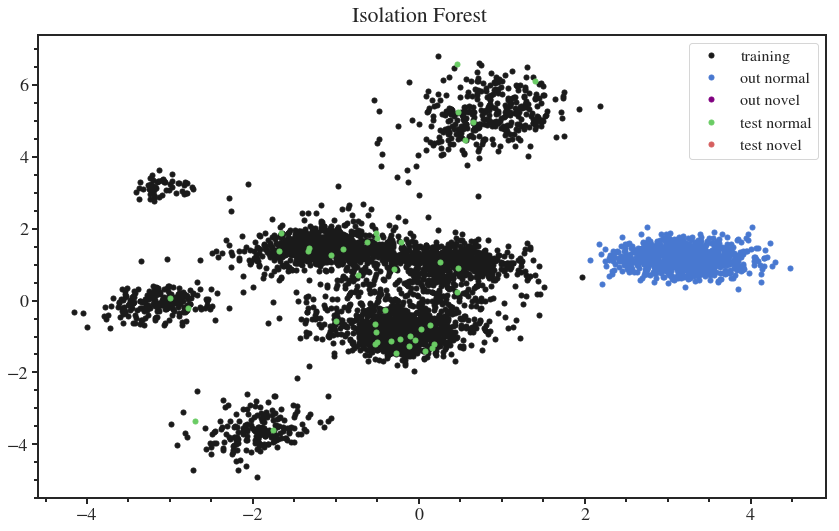

In [100]:
plot_rem_cls(1, test_idx=4000)

Number of normal in out class: 753
Number of novel in out class: 4
Number of normal in testing set: 134
Number of novel in testing class: 0


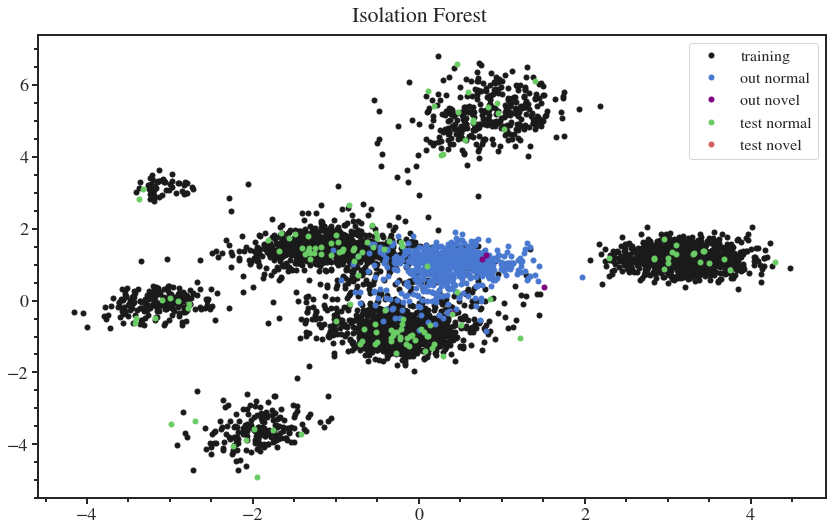

In [107]:
plot_rem_cls(0, test_idx=4000)

Number of normal in out class: 1027
Number of novel in out class: 8
Number of normal in testing set: 844
Number of novel in testing class: 12


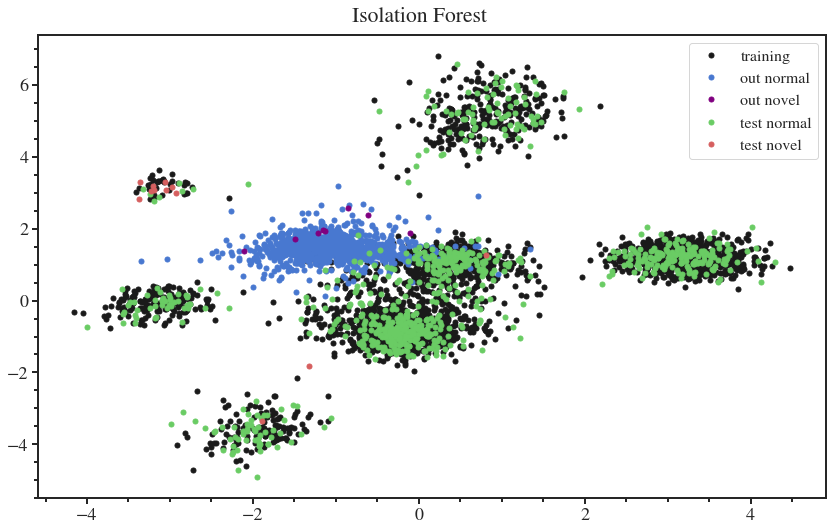

In [108]:
plot_rem_cls(2, test_idx=3000)

Number of normal: 4842
Number of novel: 49


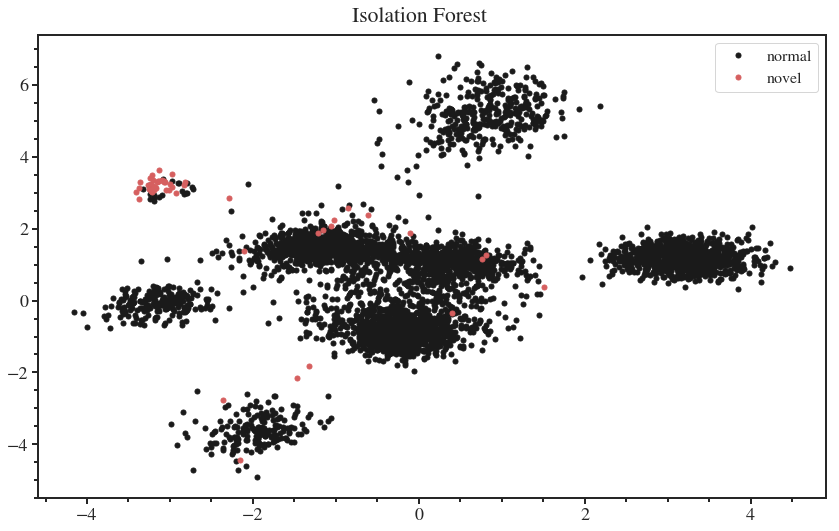

In [109]:
iso_f = IsolationForest(behaviour='new', contamination=0.01)
output = iso_f.fit_predict(psds)

plt.figure(figsize=(12, 12/1.619))

plt.suptitle('Isolation Forest', y=1.005)

normal = psd_embed[output == 1]
novel  = psd_embed[output == -1]

print("Number of normal:", len(normal))
print("Number of novel:",  len(novel))

plt.plot(normal[:,0], 
         normal[:,1], 
         'k.', label='normal', ms=10)
plt.plot(novel[:,0],
         novel[:,1],
         'r.', label='novel', ms=10)

plt.legend()
plt.show()

/home/bellinger/.local/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Number of normal: 4402
Number of novel: 489


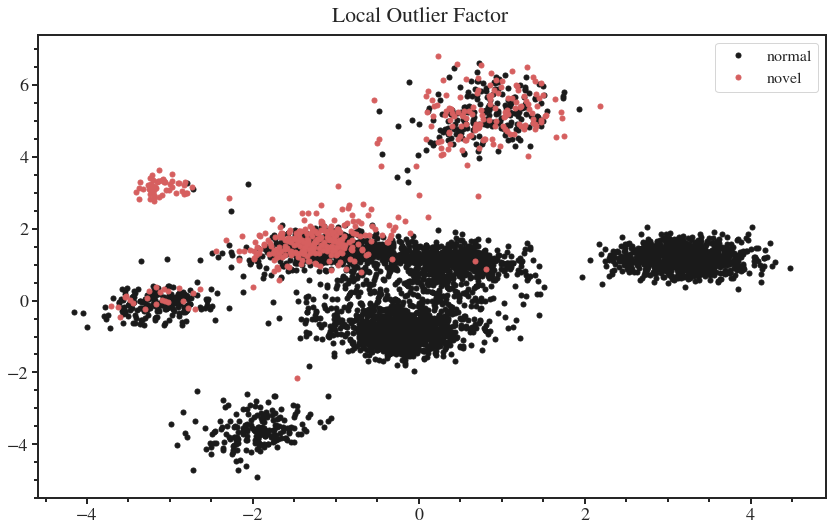

In [104]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
output = lof.fit_predict(psds)

plt.figure(figsize=(12, 12/1.619))

plt.suptitle('Local Outlier Factor', y=1.005)

normal = psd_embed[output == 1]
novel  = psd_embed[output == -1]

print("Number of normal:", len(normal))
print("Number of novel:",  len(novel))

plt.plot(normal[:,0], 
         normal[:,1], 
         'k.', label='normal', ms=10)
plt.plot(novel[:,0],
         novel[:,1],
         'r.', label='novel', ms=10)

plt.legend()
plt.show()

In [16]:
import pickle as pkl
embed = pkl.load(open('embeddings.pkl', 'rb'))

In [19]:
labels, ae_embed = embed

In [22]:
ae_embed.shape

(34867, 32)

In [23]:
from sklearn.manifold import TSNE

In [24]:
lowD = TSNE().fit_transform(ae_embed)

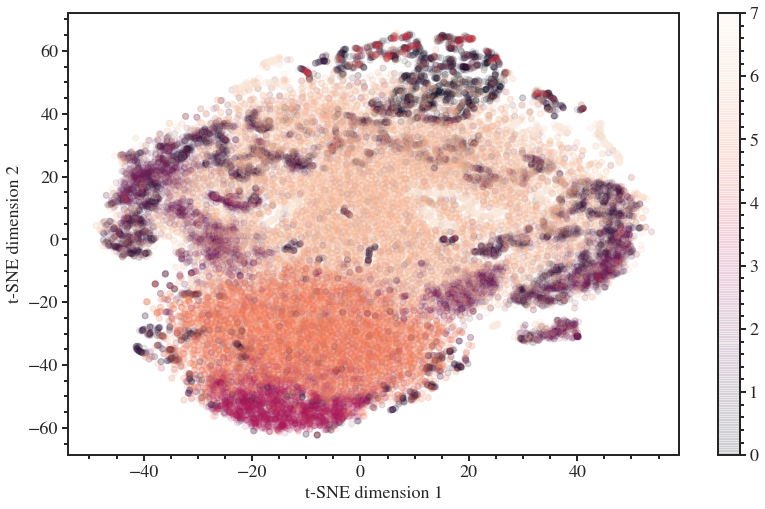

In [64]:
plt.figure(figsize=(12, 12/1.619))
plt.scatter(lowD[:,0], lowD[:,1], c=labels, alpha=0.1)
plt.xlabel("t-SNE dimension 1")
plt.ylabel("t-SNE dimension 2")
plt.colorbar()
plt.show()

In [28]:
from sklearn.decomposition import PCA

In [29]:
lowD_PCA = PCA().fit_transform(ae_embed)

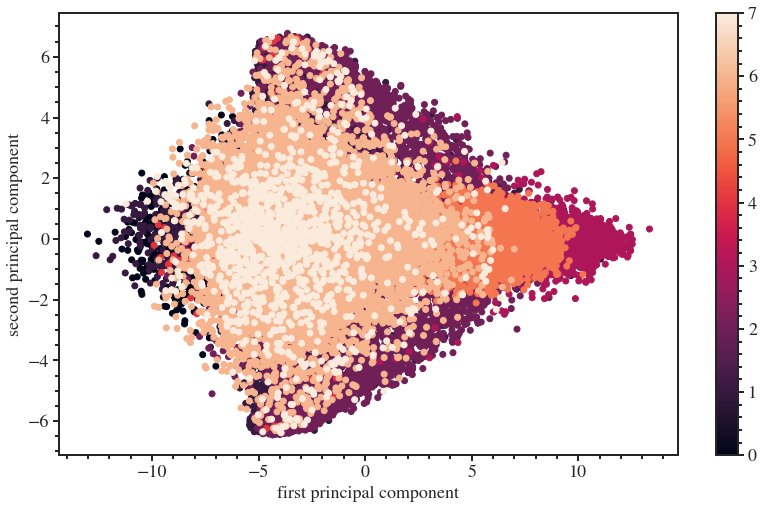

In [30]:
plt.figure(figsize=(12, 12/1.619))
plt.scatter(lowD_PCA[:,0], lowD_PCA[:,1], c=labels)
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.colorbar()
plt.show()

In [34]:
train_idxs = np.random.choice(range(ae_embed.shape[0]), size=int(ae_embed.shape[0]*0.8), replace=False)
test_idxs = np.array([x for x in range(ae_embed.shape[0]) if x not in train_idxs])
test_idxs

array([    1,     3,    11, ..., 34862, 34864, 34866])

Number of normal in out class: 348
Number of novel in out class: 23
Number of normal in test set: 6745
Number of novel in test set: 155


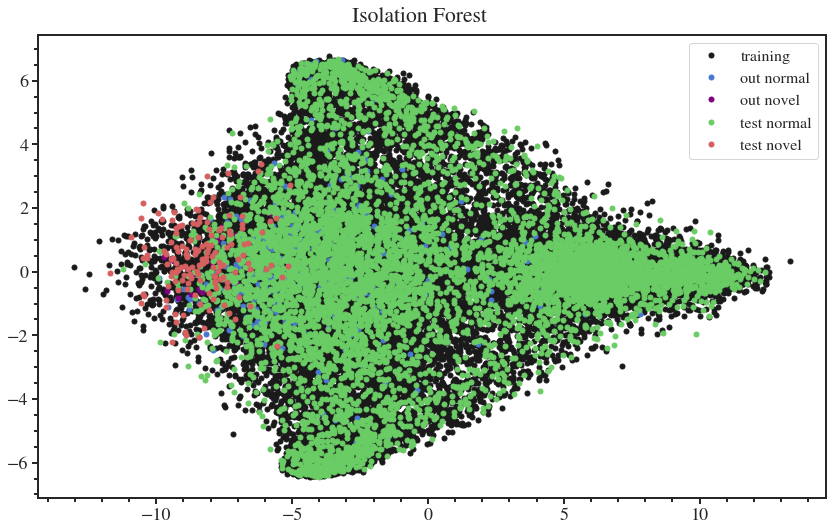

In [56]:
iso_f = IsolationForest(behaviour='new', contamination=0.02, n_estimators=128)
#oc_svm = OneClassSVM(nu=0.02)

def plot_rem_cls(test_cls=6):
    
    #in_cls = labels != test_cls
    
    in_cls  = labels != test_cls
    out_cls = labels == test_cls
    
    train_idxs = np.random.choice(range(sum(in_cls)), size=int(sum(in_cls)*0.8), replace=False)
    train_idxs_ = set(train_idxs)
    test_idxs  = np.array([x for x in range(sum(in_cls)) if x not in train_idxs_])
    #train_in_cls = labels[train_idxs] != test_cls
    #test_out_cls = labels[test_idxs] == test_cls
    #test_in_cls = labels[test_idxs] != test_cls
    
    #train_idxs = np.random.choice(range(ae_embed.shape[0]), size=int(ae_embed.shape[0]*0.8), replace=False)
    #test_idxs = np.array([x for x in range(ae_embed.shape[0]) if x not in train_idxs])
    
    iso_f.fit(ae_embed[in_cls][train_idxs])
    
    plt.figure(figsize=(12, 12/1.619))
    
    plt.plot(lowD_PCA[in_cls][train_idxs][:,0], 
             lowD_PCA[in_cls][train_idxs][:,1], 
             'k.', label='training', zorder=0, ms=10)
    plt.suptitle('Isolation Forest', y=1.005)
    
    #out_cls = np.logical_not(in_cls)
    test = iso_f.predict(ae_embed[out_cls])
    
    normal = lowD_PCA[out_cls][test == 1]
    novel  = lowD_PCA[out_cls][test == -1]
    
    print("Number of normal in out class:", len(normal))
    print("Number of novel in out class:", len(novel))
    
    plt.plot(normal[:,0], 
             normal[:,1], 
             'b.', label='out normal', ms=10)
    plt.plot(novel[:,0],
             novel[:,1],
             '.', c='purple', label='out novel', ms=10)
    
    
    test2 = iso_f.predict(ae_embed[in_cls][test_idxs])
    
    normal2 = lowD_PCA[in_cls][test_idxs][test2 == 1]
    novel2  = lowD_PCA[in_cls][test_idxs][test2 == -1]
    
    print("Number of normal in test set:", len(normal2))
    print("Number of novel in test set:", len(novel2))
    
    plt.plot(normal2[:,0], normal2[:,1], 'g.', label='test normal', ms=10)
    plt.plot(novel2[:,0],  novel2[:,1],  'r.', label='test novel', ms=10)
    
    #plt.scatter(psd_embed[train_test_cut_idx:,0], psd_embed[train_test_cut_idx:,1], label='testing set',
    #           c=['red' if x==-1 else 'blue' for x in iso_f.predict(test)], zorder=1)
    plt.legend()
    plt.show()

plot_rem_cls(4)

In [54]:
[(x, len(labels[labels==x])) for x in range(8)]

[(0, 1456),
 (1, 7273),
 (2, 5271),
 (3, 2506),
 (4, 371),
 (5, 6076),
 (6, 10577),
 (7, 1337)]

Number of normal: 34518
Number of novel: 349


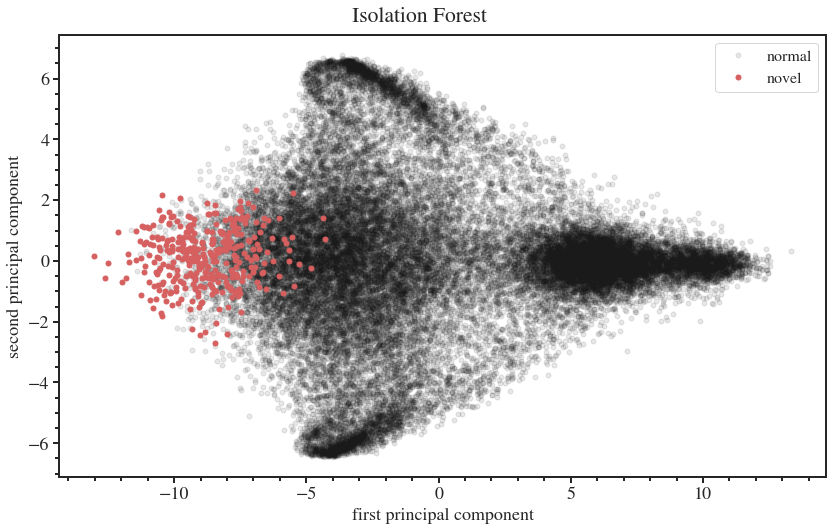

In [63]:
iso_f = IsolationForest(behaviour='new', contamination=0.01, n_estimators=128)

pred = iso_f.fit_predict(ae_embed)

plt.figure(figsize=(12, 12/1.619))
plt.suptitle('Isolation Forest', y=1.005)

plt.plot(lowD_PCA[pred == 1][:,0], 
         lowD_PCA[pred == 1][:,1], 
         'k.', label='normal', zorder=0, ms=10, alpha=0.1)

plt.plot(lowD_PCA[pred == -1][:,0], 
         lowD_PCA[pred == -1][:,1], 
         'r.', label='novel', zorder=0, ms=10)

plt.xlabel("first principal component")
plt.ylabel("second principal component")

print("Number of normal:", sum(pred == 1))
print("Number of novel:", sum(pred == -1))

plt.legend()
plt.show()

In [62]:
filemap = pkl.load(open('filemap.pkl', 'rb'))
filemap

{'GDOR_SPB': ['/home/alex/Projects/Unsupervised/kepler_q9_variability/GDOR_SPB/6864276.txt',
  '/home/alex/Projects/Unsupervised/kepler_q9_variability/GDOR_SPB/6864276.txt',
  '/home/alex/Projects/Unsupervised/kepler_q9_variability/GDOR_SPB/6864276.txt',
  '/home/alex/Projects/Unsupervised/kepler_q9_variability/GDOR_SPB/6864276.txt',
  '/home/alex/Projects/Unsupervised/kepler_q9_variability/GDOR_SPB/6864276.txt',
  '/home/alex/Projects/Unsupervised/kepler_q9_variability/GDOR_SPB/6864276.txt',
  '/home/alex/Projects/Unsupervised/kepler_q9_variability/GDOR_SPB/6864276.txt',
  '/home/alex/Projects/Unsupervised/kepler_q9_variability/GDOR_SPB/9967183.txt',
  '/home/alex/Projects/Unsupervised/kepler_q9_variability/GDOR_SPB/9967183.txt',
  '/home/alex/Projects/Unsupervised/kepler_q9_variability/GDOR_SPB/9967183.txt',
  '/home/alex/Projects/Unsupervised/kepler_q9_variability/GDOR_SPB/9967183.txt',
  '/home/alex/Projects/Unsupervised/kepler_q9_variability/GDOR_SPB/9967183.txt',
  '/home/alex/Pr